# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #FFFFFF; text-align: center; line-height: 0.55;background-color: #FE251B"><b>Heart Failure Prediction</b><br></h1>

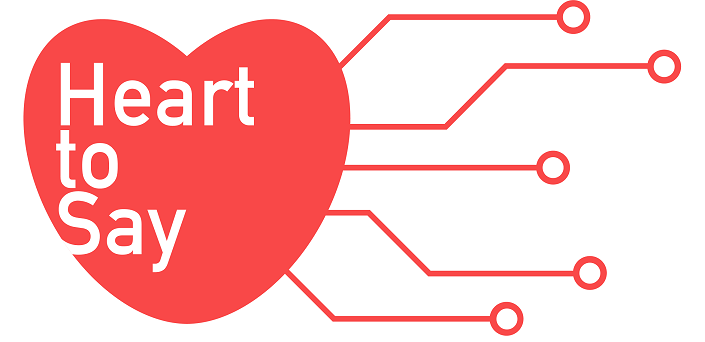

**Group A - Team members**

<ul>
    <li>Sahid Hasan Rahim</li>
    <li>Zhao Chen</li>
    <li>Ifani Pinto Nada</li>
    <li>Nan Jiang</li>
    <li>Mahmoud Elachi</li>
</ul>

### Problem Statement :

Heart Failure is a condition when the heart muscle does not pump blood as well as it should to meet the body's demands. Blood is the most important fluid that circulates throughout the body by supplying oxygen to all the parts of the body. Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. This constant threat of cardiovascular issues has been rising due to the poor lifestyle choices alongwith an ignorant attitude towards health. With majority of the people struggling with mental problems, habits like tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol have been taken up by the mass population. Thus, people that are at a high cardiovascular risk need early detection and management wherein a machine learning model can be of great help!  

### Aim :
Deliver a solution for cardiologists to
- Predict the likelihood of mortality due to heart failure
- Display the risk factors contributing to it
- Aid cardiologists in pinpointing and addressing the biggest factors


### <center>Dataset Selection</center>

The **Heart to Say** project aims to develop a prediction model to estimate the likelihood of mortality in heart failure patients, using a dataset adopted from Chicco D et al. [1, 2]. This dataset includes various features, as described under *Dataset Attributes*. It is important to note that the dataset focuses on heart failure patients in Pakistan, so the scope of this project involves predicting mortality due to heart failure within the Pakistani population.



### <center>Dataset Attributes</center>
    
    
- **Age** : age [years]

- **anaemia** : Decrease of red blood cells or hemoglobin (boolean)

- **creatinine_phosphokinase** : Level of the Creatine Phosphokinase (CPK) enzyme in the blood (mcg/L)

- **diabetes** : If the patient has diabetes (boolean)

- **ejection_fraction** : Percentage of blood leaving the heart at each contraction (percentage)

- **high_blood_pressure** : If the patient has hypertension (boolean)

- **platelets** : Platelets in the blood (kiloplatelets/mL)

- **serum_creatinine** : Level of serum creatinine in the blood (mg/dL)

- **serum_sodium** : Level of serum sodium in the blood (mEq/L)

- **sex** : Woman(0) or man(1) (binary)

- **smoking** : If the patient smokes or not (boolean)

- **time** : Follow-up period (days)

- **DEATH_EVENT** : If the patient deceased during the follow-up period (boolean)

### Notebook Contents :
- Dataset Information
- Exploratory Data Analysis (EDA)
- Summary of EDA & Comparison with Domain Information
- Feature Engineering (Data Balancing)
- Modeling
- Conclusion

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Dataset Information</div></center>

### Import the Necessary Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'seaborn'

In [5]:
data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1


### Data Info :

In [6]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


The dataset consists of 299 rows and 13 columns. The data type of all variables are numeric.

In [8]:
# sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);
data.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

**No null values** present in the data!

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.00,60.83,11.89,40.00,51.00,60.00,70.00,95.00
anaemia,299.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
creatinine_phosphokinase,299.00,581.84,970.29,23.00,116.50,250.00,582.00,7861.00
diabetes,299.00,0.42,0.49,0.00,0.00,0.00,1.00,1.00
ejection_fraction,299.00,38.08,11.83,14.00,30.00,38.00,45.00,80.00
high_blood_pressure,299.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
platelets,299.00,263358.03,97804.24,25100.00,212500.00,262000.00,303500.00,850000.00
serum_creatinine,299.00,1.39,1.03,0.50,0.90,1.10,1.40,9.40
serum_sodium,299.00,136.63,4.41,113.00,134.00,137.00,140.00,148.00
sex,299.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00


**Basic descriptive statistics:**

- The average value of age is 60.83, the highest value is 95

- The average value of creatinine_phosphokinase is 581.83, the highest value is 7861

- The average value of ejection_fraction is 30.08, the highest value is 80

- The average value of platelets is 263358, the highest value is 850000

- The average value of serum_creatinine is 1.39, the highest value is 9.4

- The average value of serum_sodium is 136.62, the highest value is 148

- The average value of time is 130.26, the highest value is 285

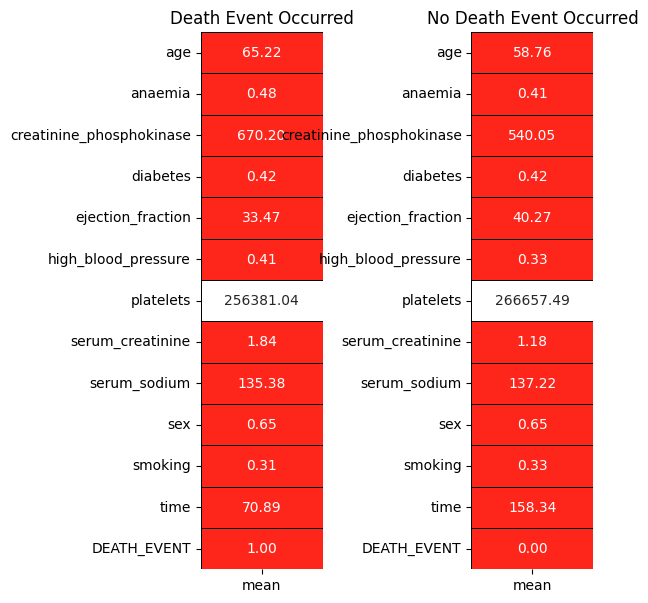

In [10]:
yes = data[data['DEATH_EVENT'] == 1].describe().T
no = data[data['DEATH_EVENT'] == 0].describe().T

colors = ['#FE251B','#FFFFFF']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5),)
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Death Event Occurred');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Death Event Occurred');

fig.tight_layout(pad = -3)

**Mean** values of all the features for cases of **DEATH_EVENT** and **No DEATH_EVENT**.

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

### Dividing features into Numerical and Categorical :

In [11]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 5:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time


Here, numerical features are defined if the the attribute has more than 5 unique elements else it is a categorical feature.<br>
By the way, all categorical features here are boolean features.

In [12]:
data['age'] = data['age'].astype(int)
data['platelets'] = data['platelets'].astype(int)
df1 = data.copy(deep = True)

- Converting the datatypes of **age** and **platelets** features from float to integer.
- Creating a deep copy of the orginal dataset for experimenting with data, visualization and modeling.
- Modifications in the original dataset will not be highlighted in this deep copy.

### Categorical Features :

#### Distribution of Categorical Features :

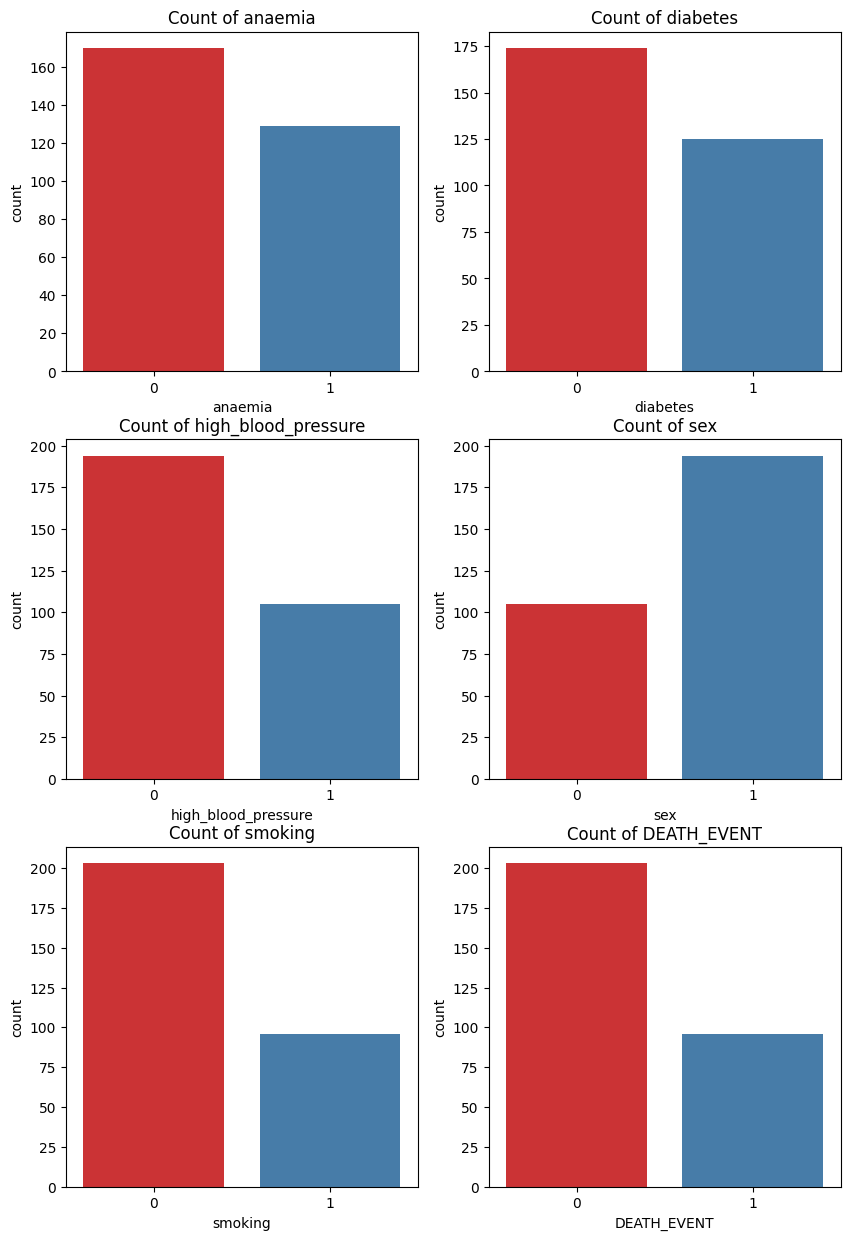

In [13]:
# Since they are all boolean features, we use countplot.
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
for i in range(len(categorical_features)):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=df1[categorical_features[i]], palette="Set1");
    title = 'Count of ' + categorical_features[i]
    plt.title(title)

The above graphs show distribution of categorical features.

### Numerical Features :

#### Distribution of Numerical Features :

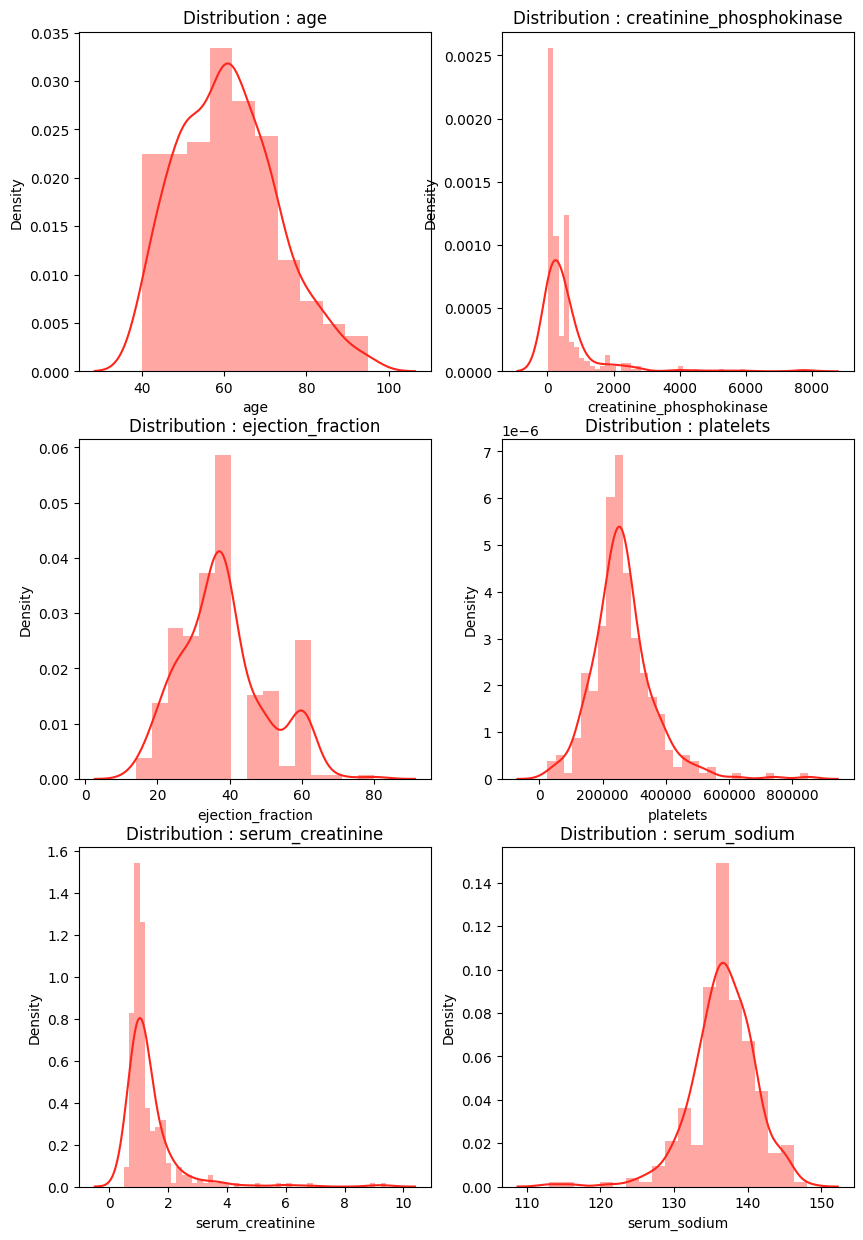

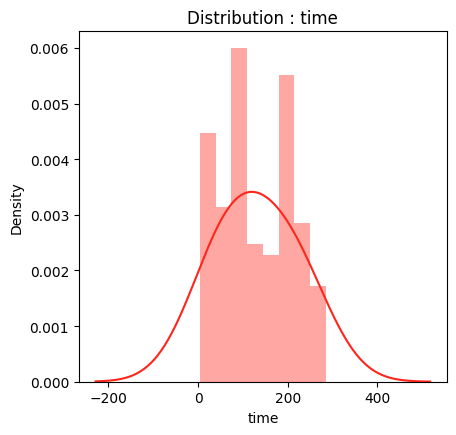

In [14]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(numerical_features) - 1):
    plt.subplot(3,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

- **Age**,**Creatinine_Phosphokinase**,**Ejaction_Fraction** and **Serum_creatinine** have a **rightly** or **positively skewed** data distribution.
- **Platelets** and **Serum_Sodium** are near about **normally distributed**.
- **Time's** data distribution is similar to a typical **Time Series Analysis** graph with irregularities present in it.

### Target Variable Visualization (DEATH_EVENT) :

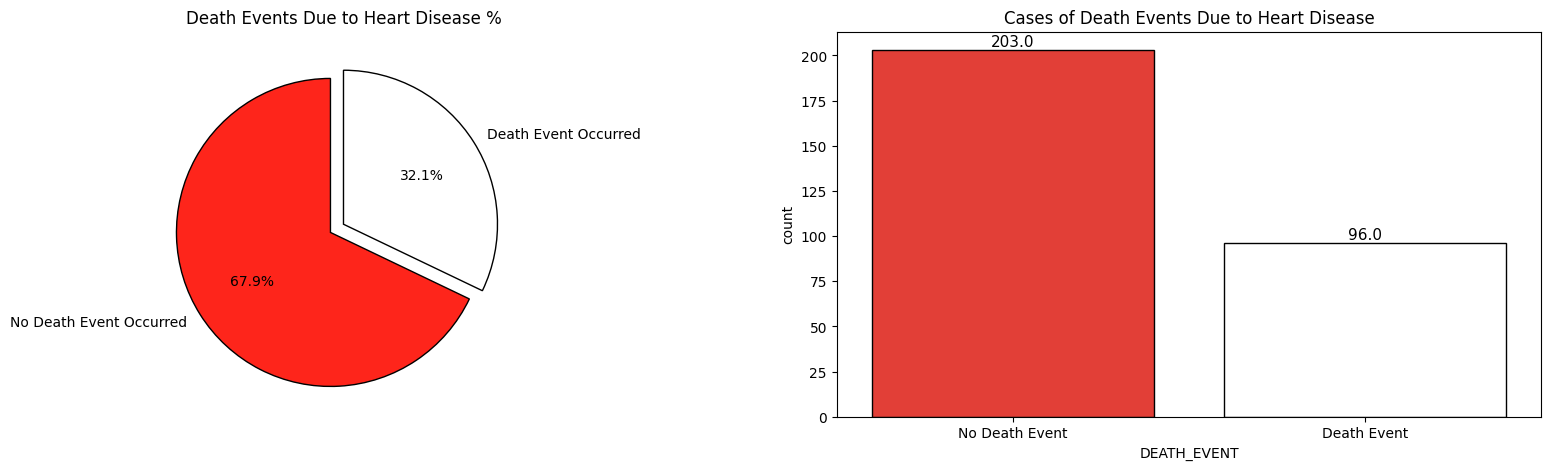

In [15]:
l = list(data['DEATH_EVENT'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Death Event Occurred','Death Event Occurred'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Death Events Due to Heart Disease %');

plt.subplot(1,2,2)
# ax = sns.countplot('DEATH_EVENT', data=data , palette = colors,edgecolor = 'black')
ax = sns.countplot(x='DEATH_EVENT', palette=colors, edgecolor='black', data=data)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Death Event','Death Event'])
plt.title('Cases of Death Events Due to Heart Disease');
plt.show()

- The dataset is **unbalanced** with very low data points (299)!
- Around **2 : 1** ratio for **No Death Event cases : Death Event cases!**
- Due to this, predictions will be biased towards **No Death Event** cases.
- Visualizations will also display this bias, thus making it difficult to gain insight.

### Categorical Features vs Target Variable (DEATH_EVENT) :

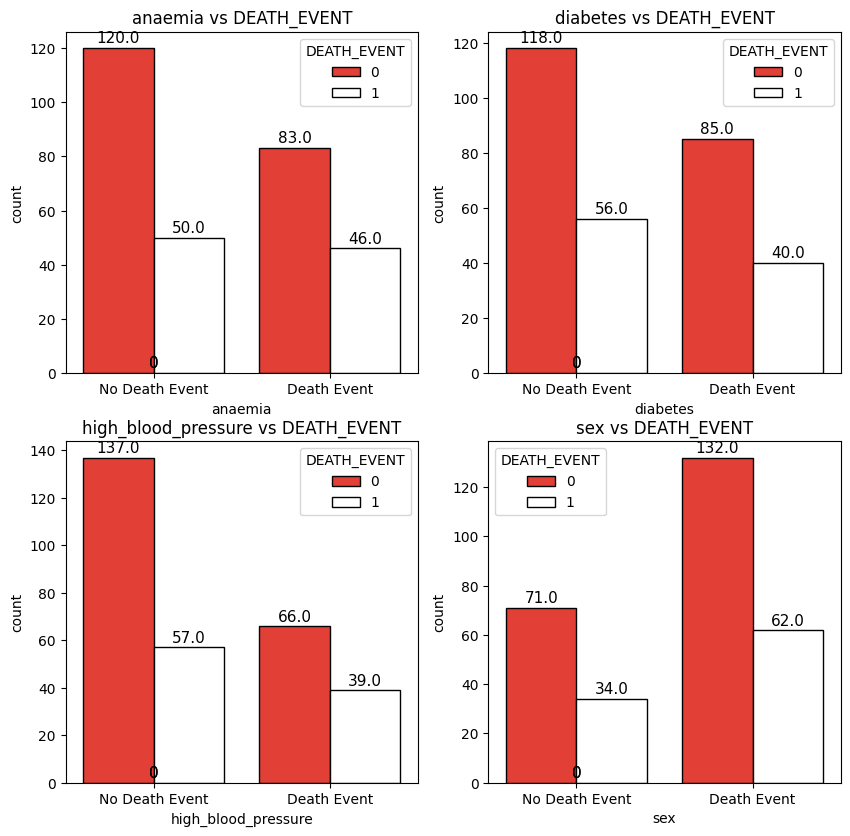

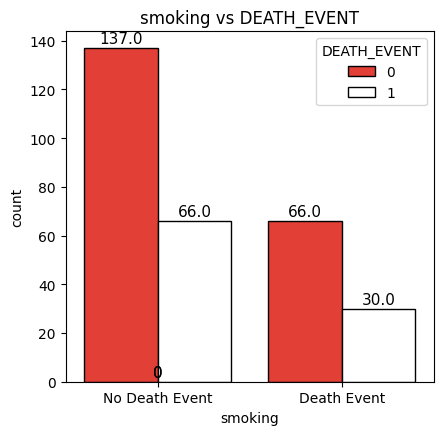

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 9.75))
for i in range(len(categorical_features) - 2):
    ax = axs[i // 2, i % 2]
    sns.countplot(x=categorical_features[i], data=data, hue="DEATH_EVENT", palette=colors, edgecolor='black', ax=ax)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
    ax.set_xticklabels(['No Death Event', 'Death Event'])
    title = categorical_features[i] + ' vs DEATH_EVENT'
    ax.set_title(title)

plt.figure(figsize=(4.75, 4.55))
ax = sns.countplot(x=categorical_features[-2], data=data, hue="DEATH_EVENT", palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Death Event', 'Death Event'])
title = categorical_features[-2] + ' vs DEATH_EVENT'
ax.set_title(title)
plt.show()

- all the graphs near about share the same pattern.
- nothing special here.

### Categorical Features vs Cases of DEATH_EVENT :

In [17]:
anaemia = data[data['DEATH_EVENT'] == 1]['anaemia'].value_counts()
anaemia = [anaemia[0] / sum(anaemia) * 100, anaemia[1] / sum(anaemia) * 100]

diabetes = data[data['DEATH_EVENT'] == 1]['diabetes'].value_counts()
diabetes = [diabetes[0] / sum(diabetes) * 100,diabetes[1] / sum(diabetes) * 100]

hbp = data[data['DEATH_EVENT'] == 1]['high_blood_pressure'].value_counts()
hbp = [hbp[0] / sum(hbp) * 100,hbp[1] / sum(hbp) * 100]

sex = data[data['DEATH_EVENT'] == 1]['sex'].value_counts() # for male examples
sex = [sex[0] / sum(sex) * 100,sex[1] / sum(sex) * 100]

smoke = data[data['DEATH_EVENT'] == 1]['smoking'].value_counts()
smoke = [smoke[0] / sum(smoke) * 100,smoke[1] / sum(smoke) * 100]

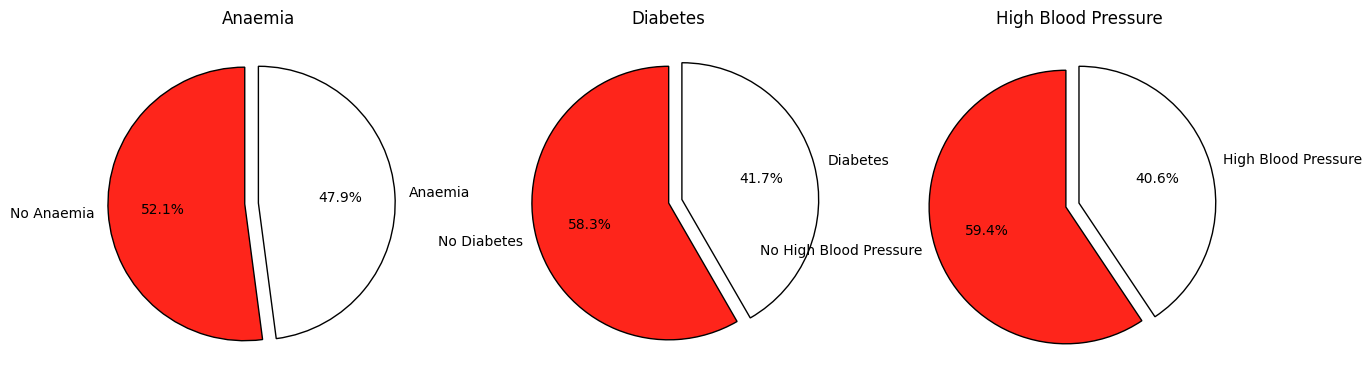

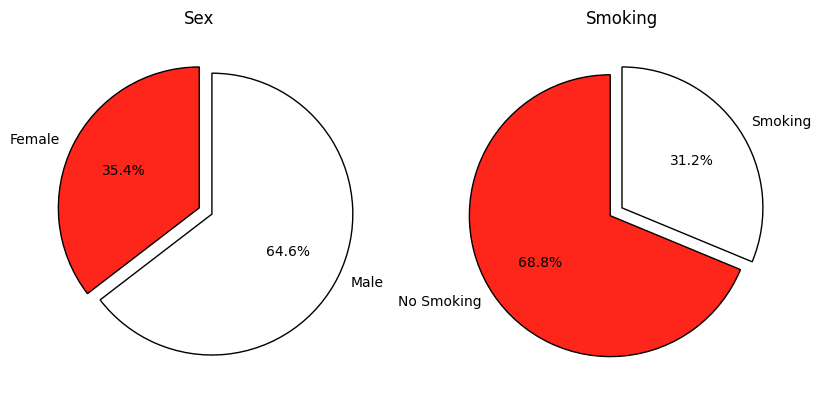

In [18]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))

plt.subplot(1,3,1)
plt.pie(anaemia,labels = ['No Anaemia','Anaemia'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Anaemia');

plt.subplot(1,3,2)
plt.pie(diabetes,labels = ['No Diabetes', 'Diabetes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Diabetes');

plt.subplot(1,3,3)
plt.pie(hbp,labels = ['No High Blood Pressure','High Blood Pressure'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('High Blood Pressure');

ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
plt.pie(sex,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(1,2,2)
plt.pie(smoke,labels = ['No Smoking','Smoking'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Smoking');

The pattern is just the same as the former.

### Numerical Features vs Target Variable (DEATH_EVENT) :

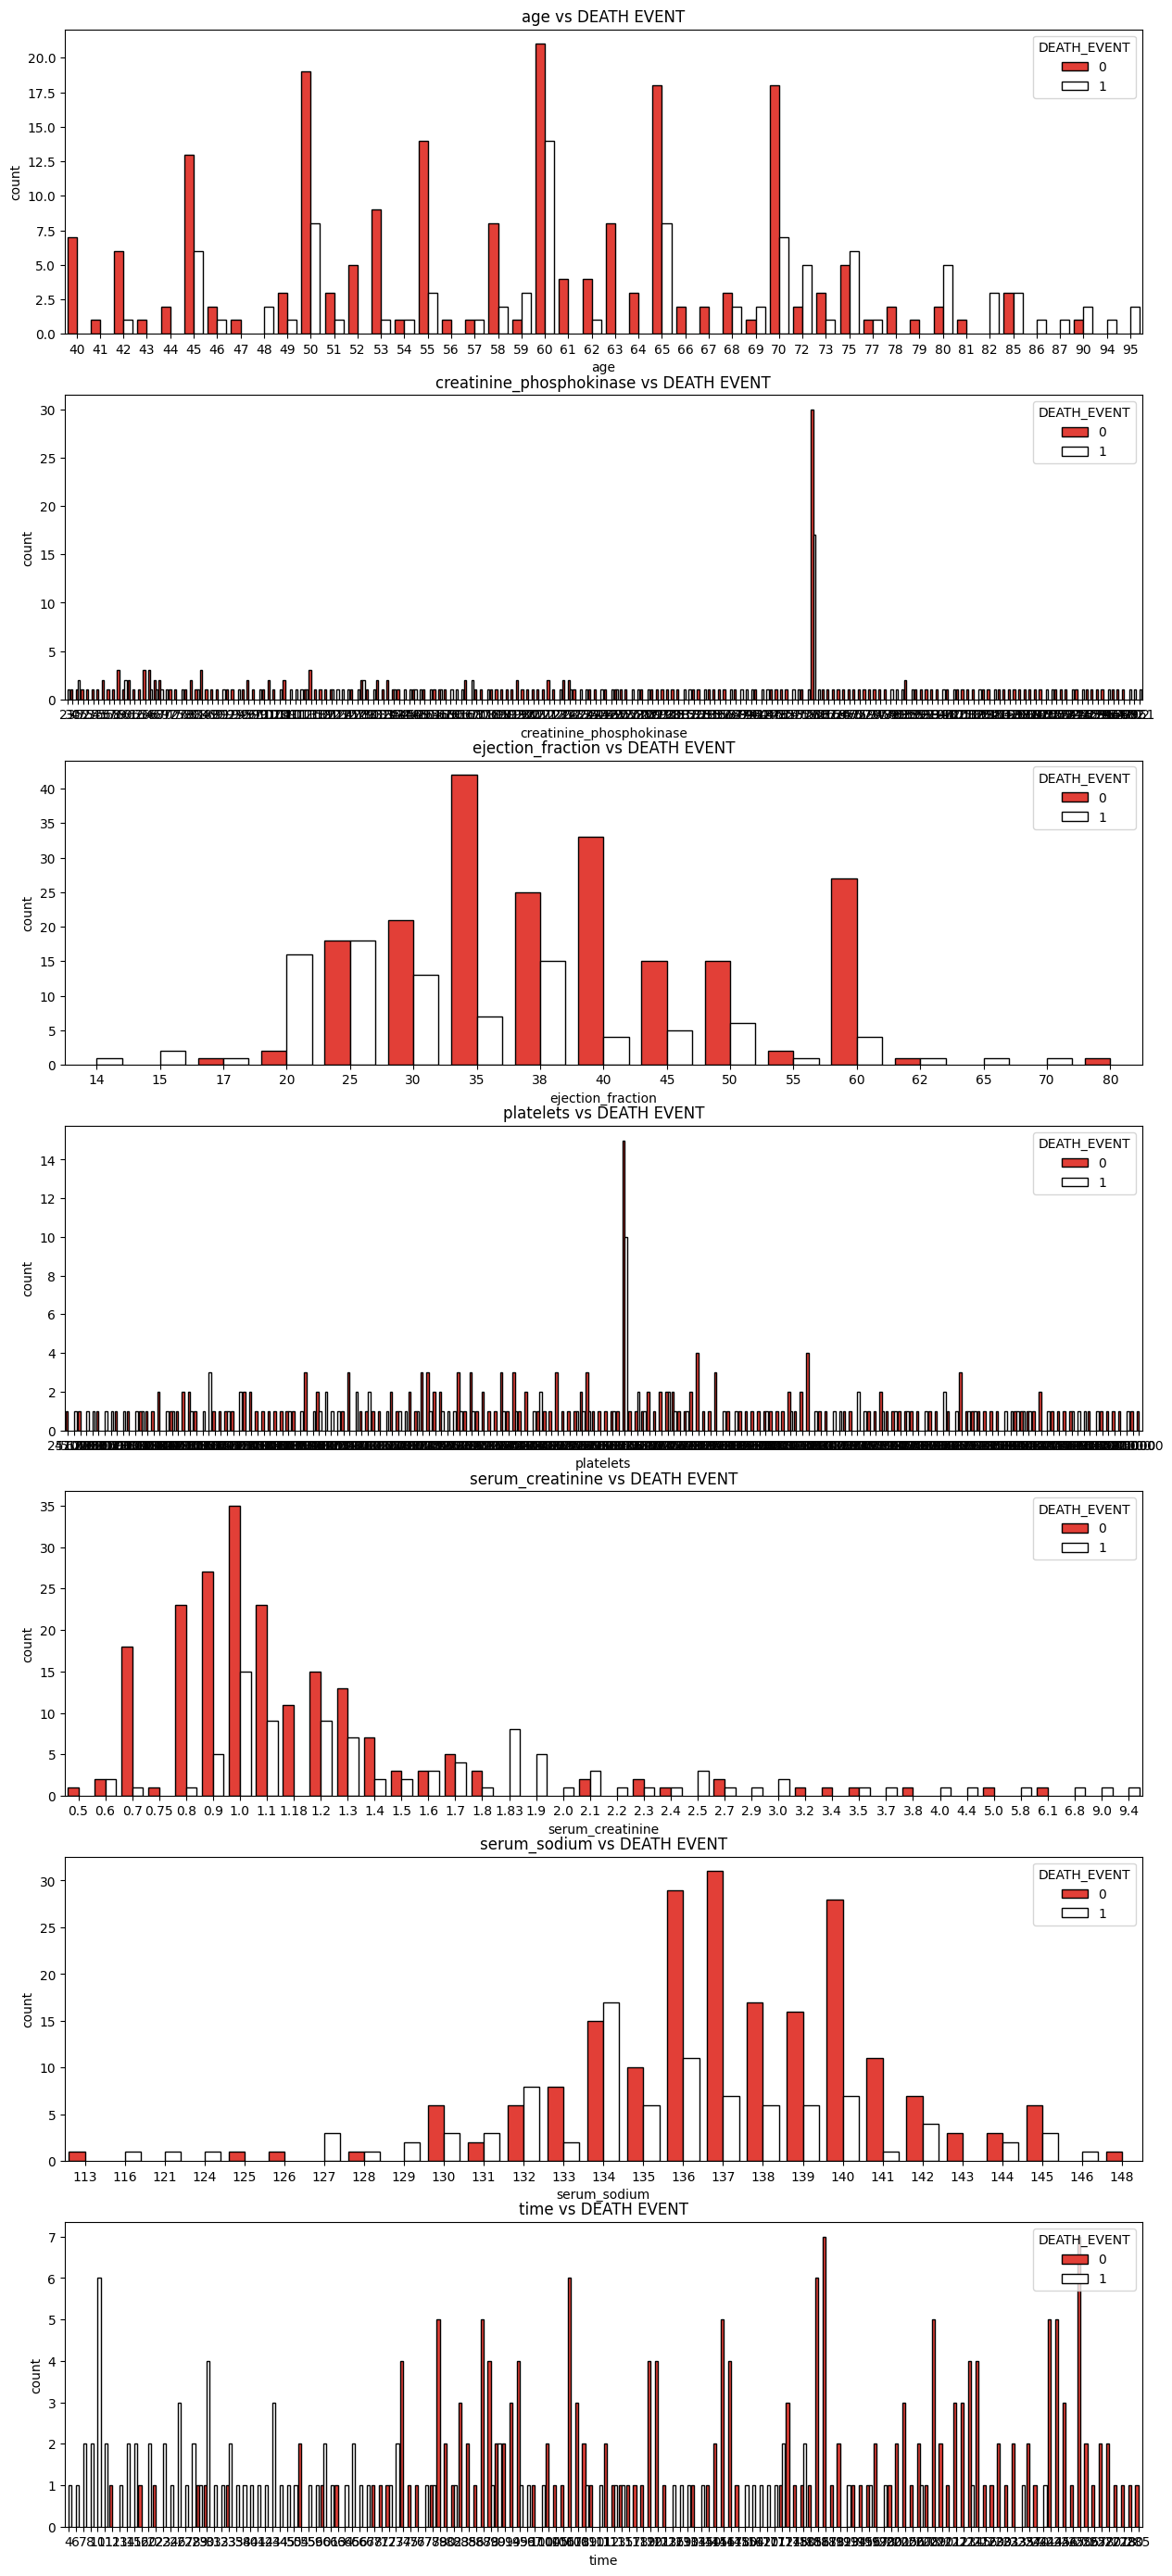

In [19]:
fig, ax = plt.subplots(nrows = 7,ncols = 1,figsize = (15,35),squeeze = False)
for i in range(len(numerical_features)):
    plt.subplot(7,1,i+1)
    sns.countplot(x=numerical_features[i],data = df1,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
    title = numerical_features[i] + ' vs DEATH EVENT'
    plt.title(title)

- Cases of **DEATH_EVENT** initiate from the age of **42**. Some specific peaks of high cases of **DEATH_EVENT** can be observed at **45**, **50**, **60**, **65**, **70**, **75** and **80**.
- High cases of **DEATH_EVENT** can be observed for **ejaction_fraction** values from **20 - 60**.
- **serum_creatinine** values from **0.6 - 3.0** have higher probability to lead to **DEATH_EVENT**.
- **serum_sodium** values **127 - 145** indicate towards a **DEATH_EVENT** due to heart failure.

- Because of too many unique data points in the **creatinine_phosphokinase**, **platelets** and **time** features, it is difficult to gain any type of insight. Thus, we will convert these features into categorical features for visualizations.
- We scale the data points of these features to a constant value that represents a range of values.(like mean)
- Here, we divide the data points constant value and assign its quotient value as the representative constant for that data point. The scaling constants are decided by looking into the data & intuition.

In [20]:
data['creatinine_phosphokinase_Group'] = [ int(i / 100) for i in data['creatinine_phosphokinase']]
data['platelets_Group'] = [ int(i / 10**5) for i in data['platelets']]
data['time_Group'] = [ int(i / 5) for i in data['time']]

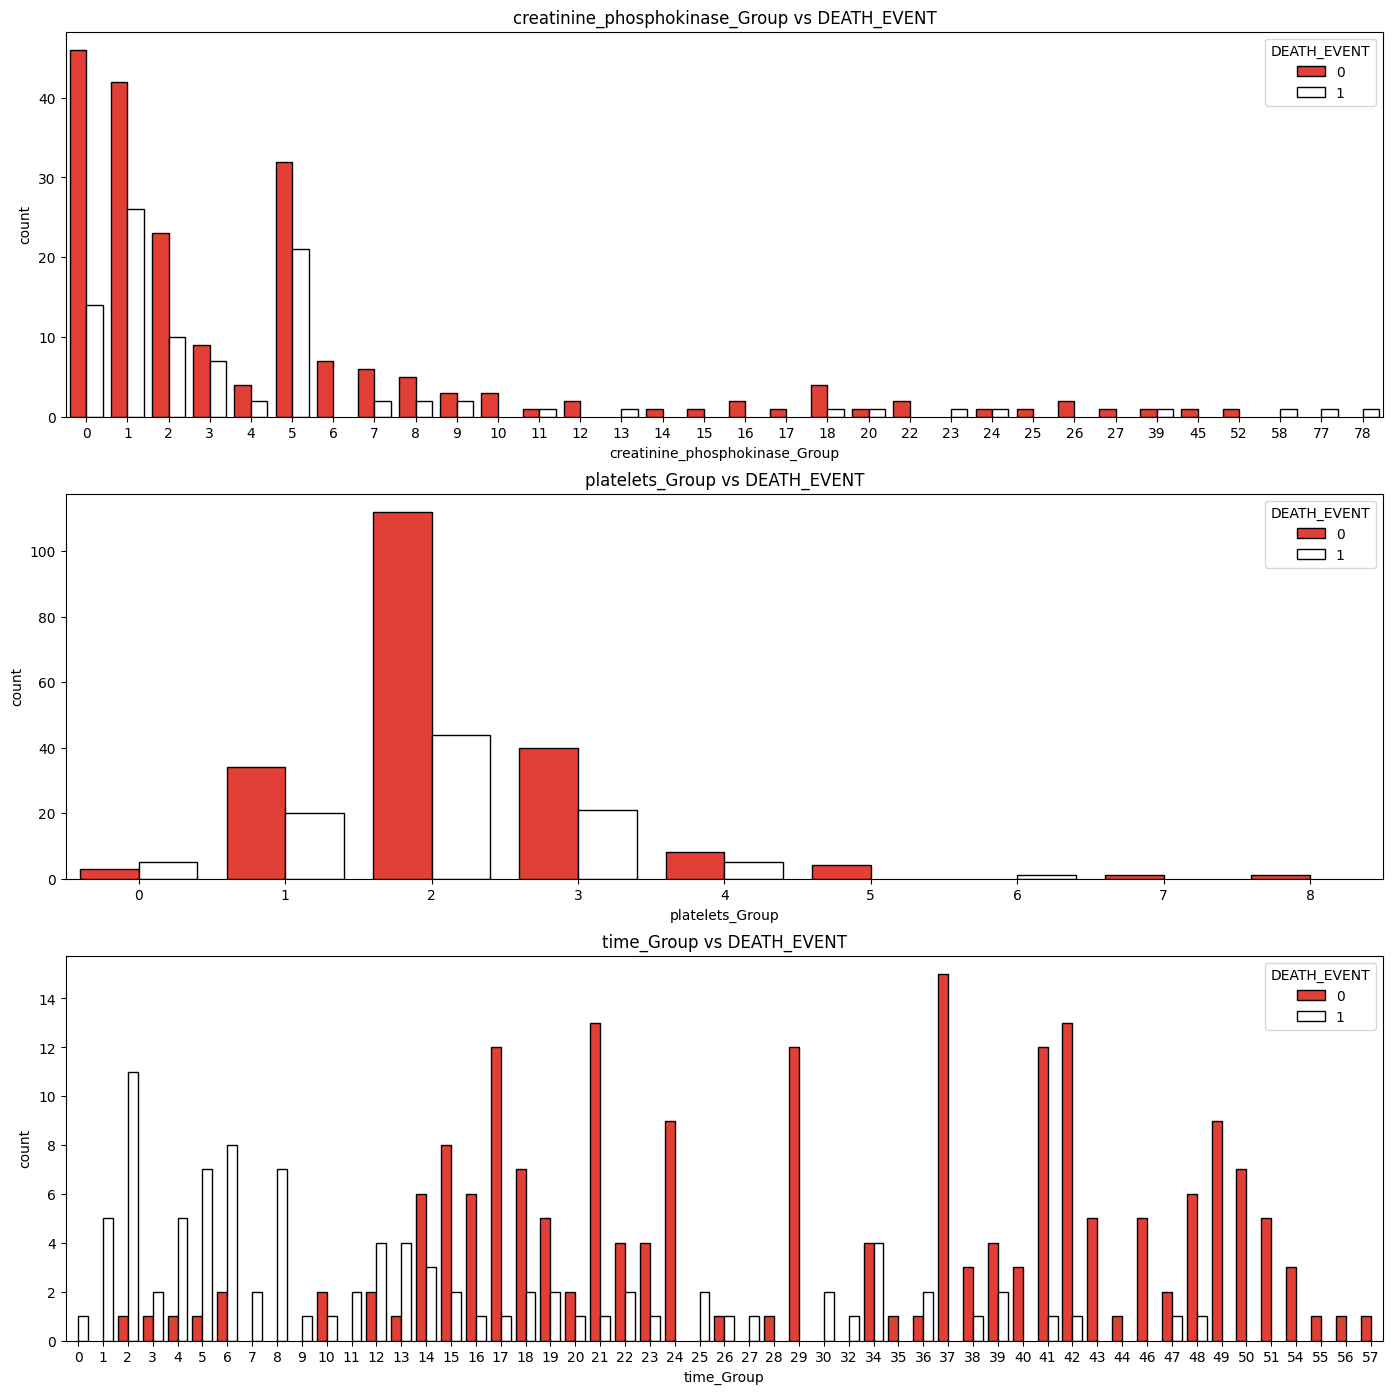

In [21]:
# fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (17,17))
# group_numerical_features = [i + '_Group' for i in ['creatinine_phosphokinase','platelets','time']]

# for i in range(len(group_numerical_features)):
#     plt.subplot(3,1,i+1)
#     sns.countplot(group_numerical_features[i],data = df1,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
#     title = group_numerical_features[i] + ' vs DEATH_EVENT'
#     plt.title(title)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 17), squeeze=False)
group_numerical_features = [i + '_Group' for i in ['creatinine_phosphokinase','platelets','time']]

for i in range(len(group_numerical_features)):
    ax = axs[i, 0]
    sns.countplot(x=group_numerical_features[i], data=data, hue="DEATH_EVENT", palette=colors, edgecolor='black', ax=ax)
    title = group_numerical_features[i] + ' vs DEATH_EVENT'
    ax.set_title(title)

plt.show()

- **DEATH_EVENT** cases are on a high for the values between **0**(0x100) - **500**(5x100) for **creatinine_phosphokinase**.   
- **platelets** values between **0**(0x10^5) - **400,000**(4x10^5) are prone to heart failures leading to **DEATH_EVENT**.
- For the **time** feature, values from **0**(0x5) - **170**(34x5) have higher probability to lead to a **DEATH_EVENT**.

### Categorical features vs Numerical features w.r.t Target variable(DEATH_EVENT) :

#### anaemia vs Numerical Features :

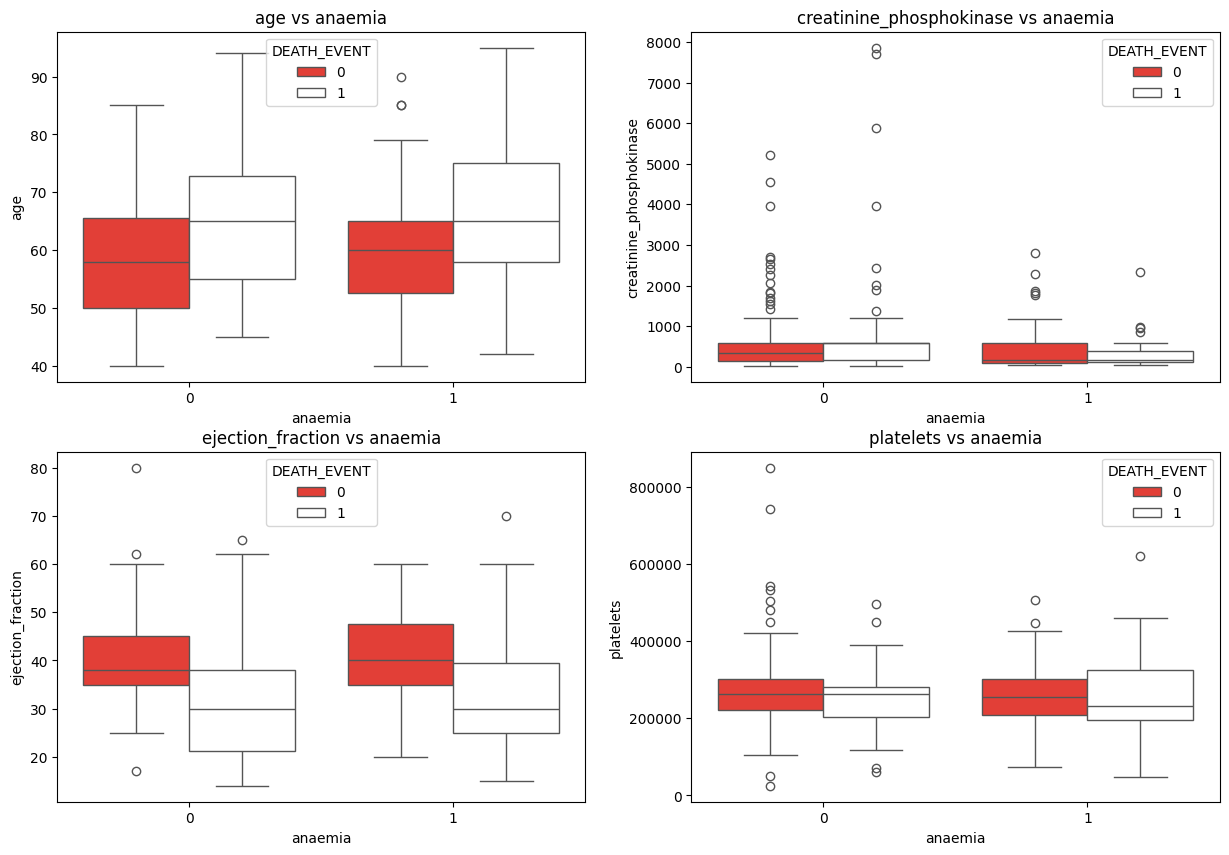

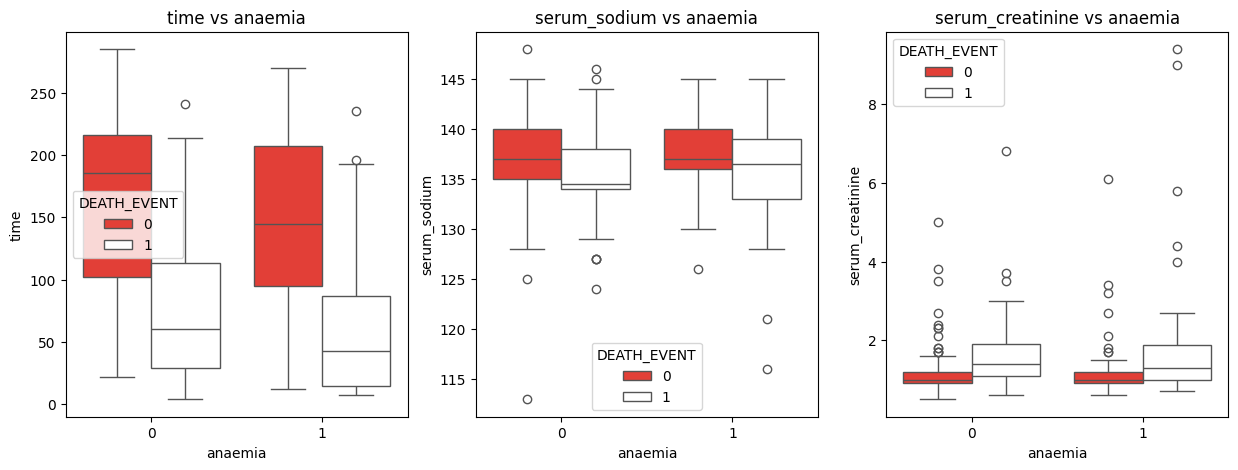

In [22]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'anaemia',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs anaemia'
    plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'anaemia',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs anaemia'
    plt.title(title);

- Irrespective of **anaemia**, **age** group of **55 - 75** and **ejaction_fraction** values of **20 - 40** are prone to **DEATH_EVENT**.
- Similarly, **serum_creatinine** levels between **1 - 2** and **serum_sodium** levels of **130 - 140** display a higher chance of confronting a **DEATH_EVENT**.

#### diabetes vs Numerical Features :

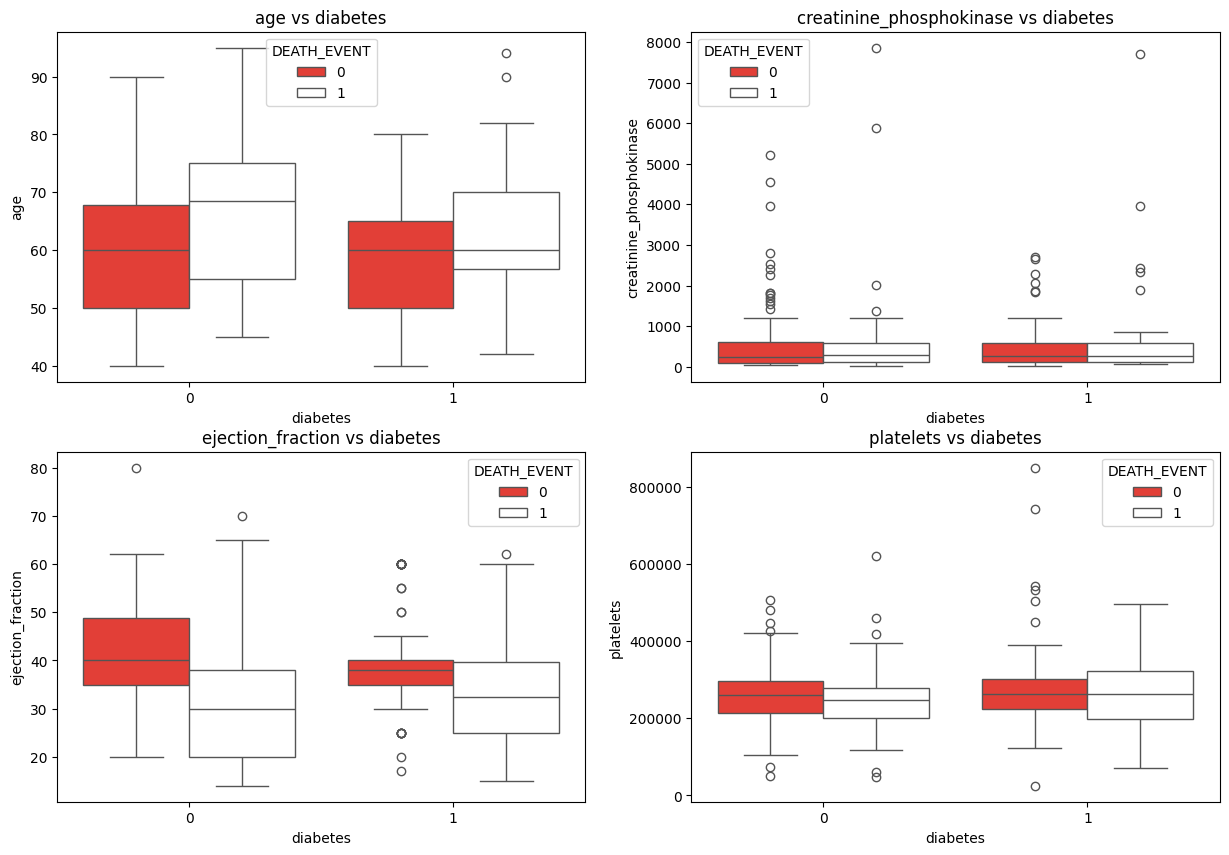

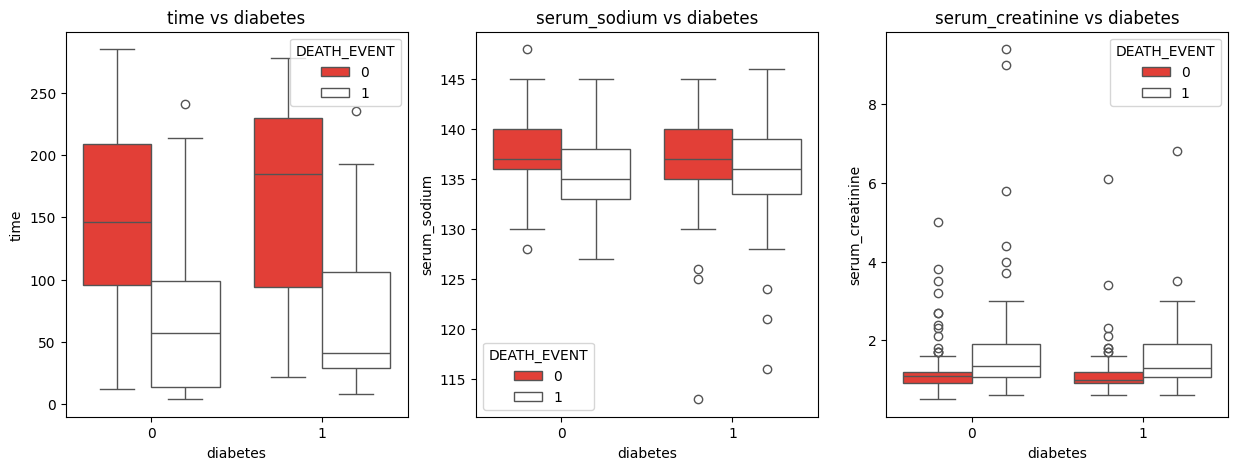

In [23]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'diabetes',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs diabetes'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'diabetes',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs diabetes'
    plt.title(title);

- For **creatinine_phosphokinase**, values from **0 - 500** and **platelets** range from **2x10^5 - 3x10^5** detect more cases of heart failure.
- Similarly, **serum_creatinine** levels between **1 - 2** and **time** feature's values from **0 - 100** highlight more heart failure cases.

#### high_blood_pressure vs Numerical features :

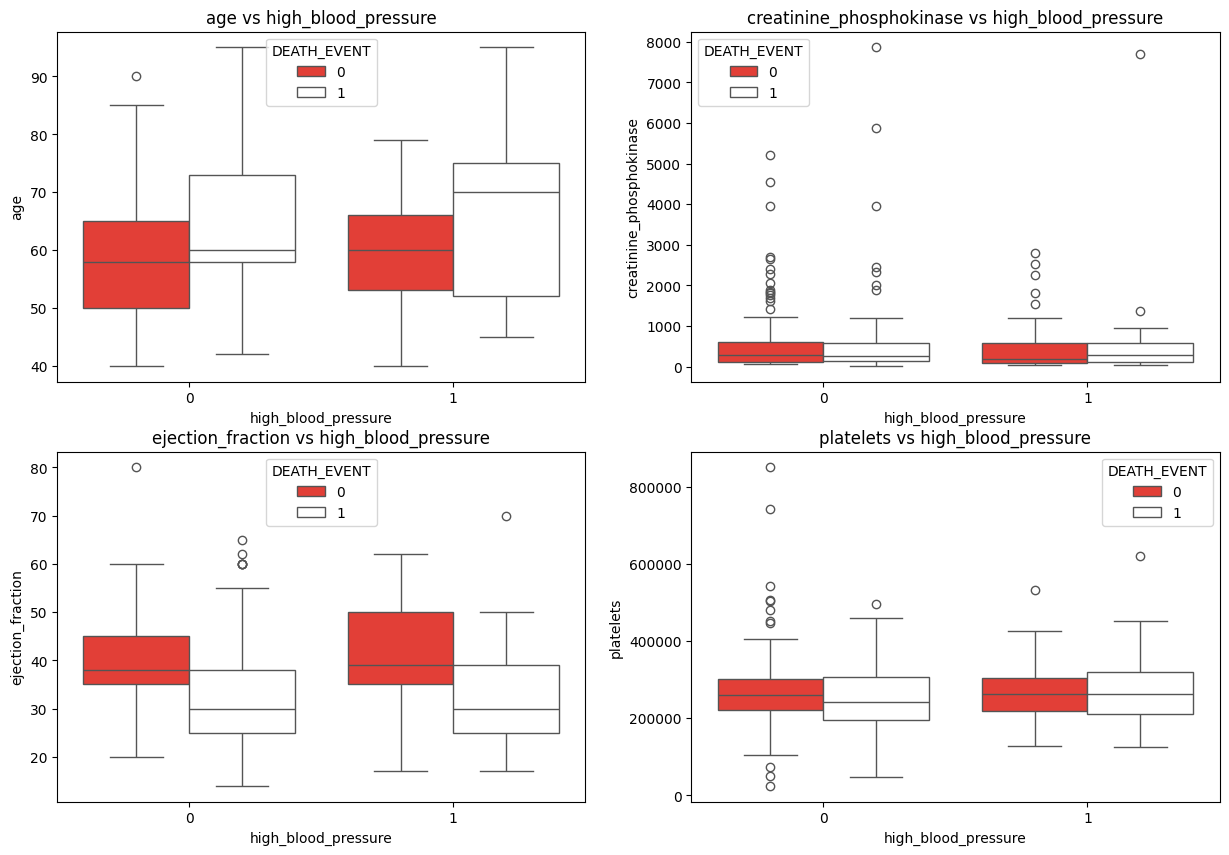

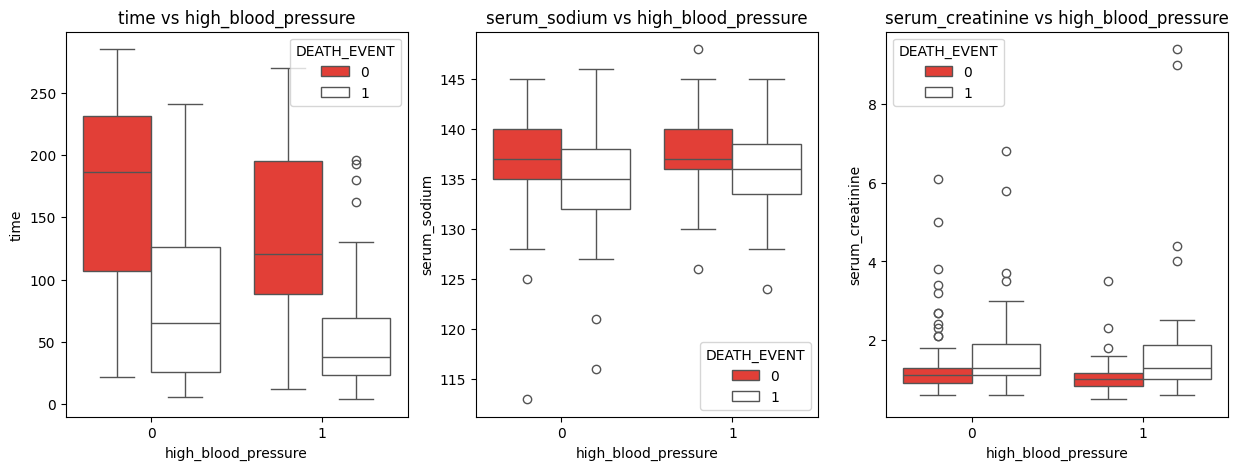

In [24]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'high_blood_pressure',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs high_blood_pressure'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'high_blood_pressure',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs high_blood_pressure'
    plt.title(title);

- Due to **high_blood_pressure**, **age** at which the **DEATH_EVENT** occurs for heart failure increases its range of values. The lower threshold of age limit drops just **below 55** and upper limit extends **over 70**.
- Chances of confronting a **DEATH_EVENT** due to **high_blood_pressure** lowers the values of **time** feature's values and increases the chances of heart failure.

#### sex vs Numerical Features :

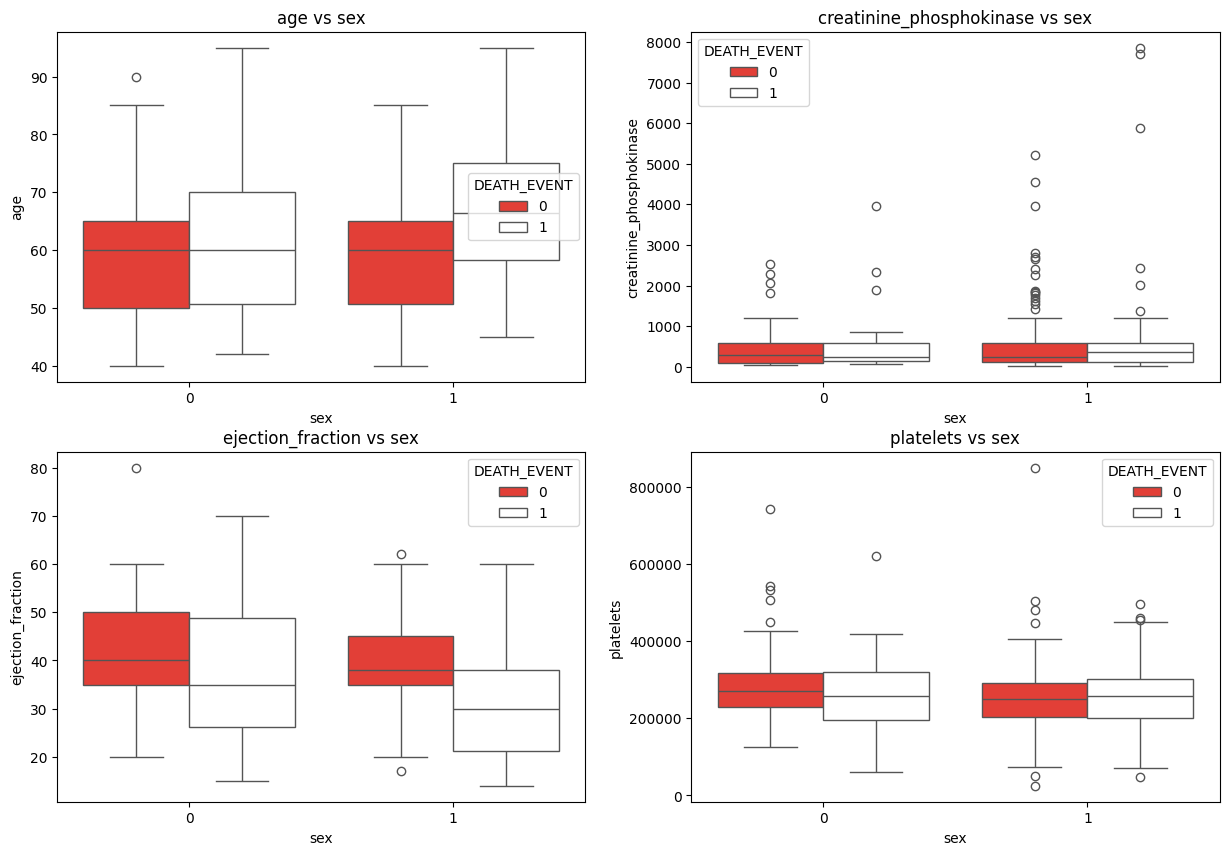

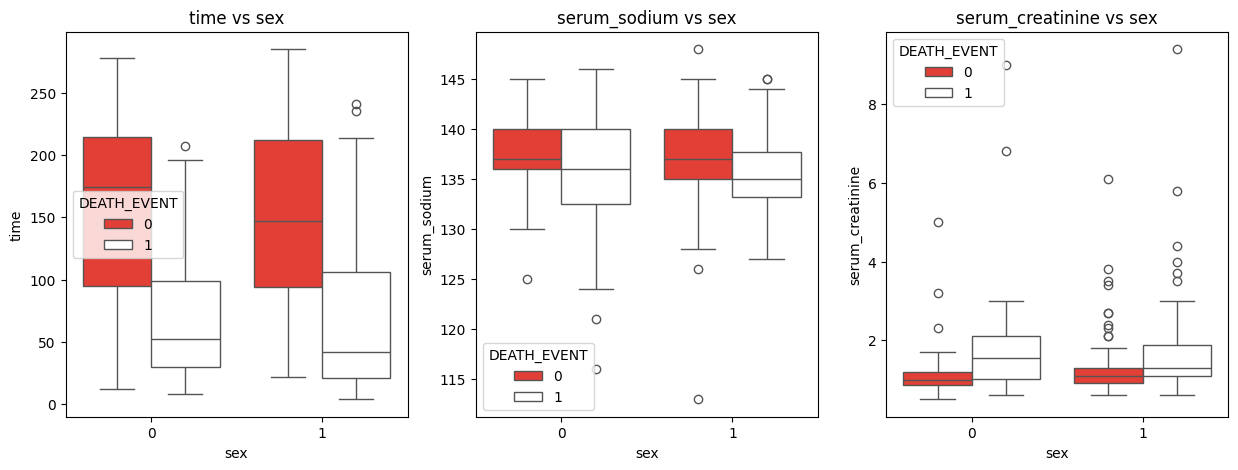

In [25]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'sex',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs sex'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'sex',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs sex'
    plt.title(title);

- For female(0) population, **age** group **50 - 70** and male(1) population's **age** group **60 - 75** are more prone to heart failure leading to **DEATH_EVENT**.
- **ejaction_fraction** values for female(0) population of **25 - 50** and **20 - 40** for male(1) population leads to cases of **DEATH_EVENT**.
- **serum_sodium** values indicating **DEATH_EVENT** due to heart failure is different for male and female.

#### smoking vs Numerical Features :

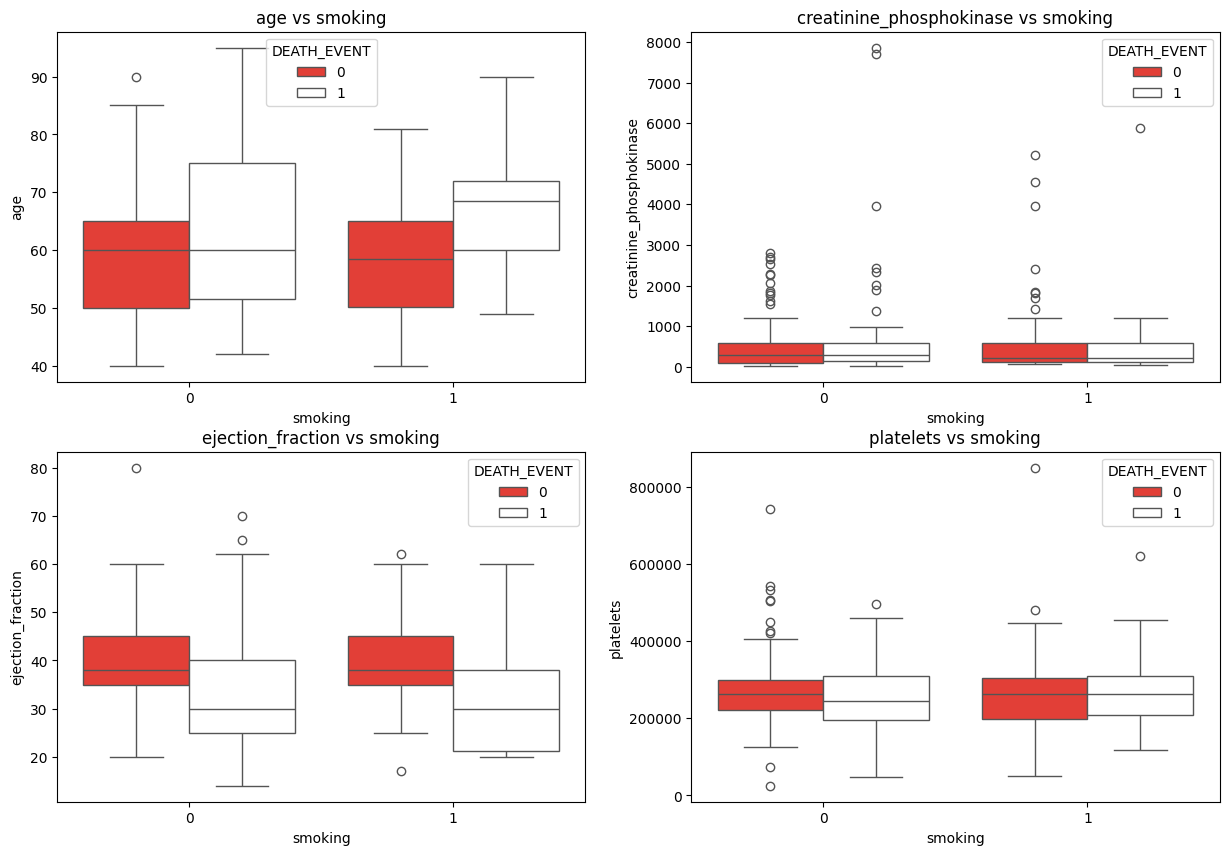

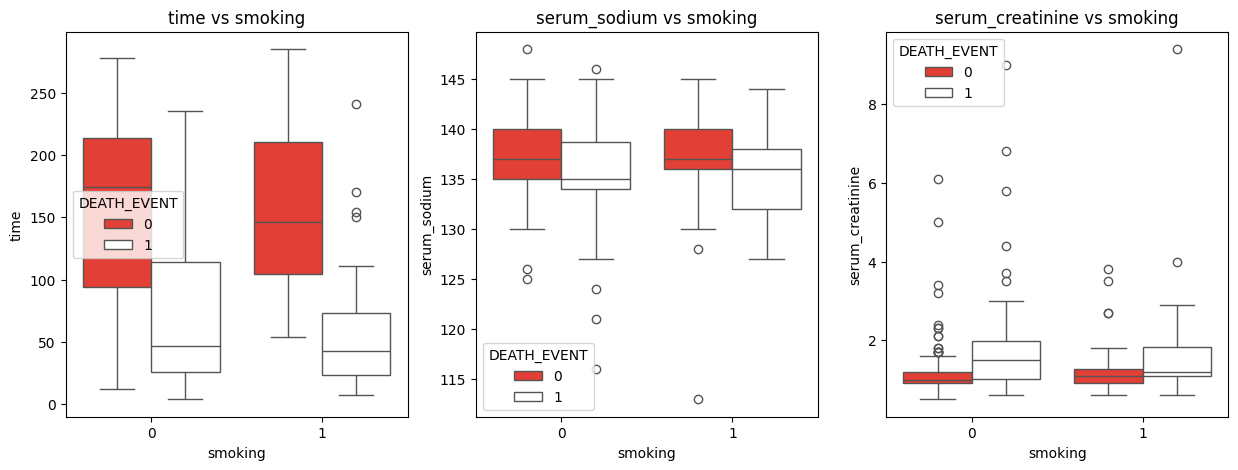

In [26]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'smoking',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs smoking'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'smoking',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs smoking'
    plt.title(title);

- **age** group of **60 - 70** dominates the cases for **DEATH_EVENT** due to **smoking**.
- **Smoking** reduces the range of values for feature **time** to **0 - 75** that someone might face a **DEATH_EVENT**.

### Numerical features vs Numerical features w.r.t Target variable(DEATH_EVENT) :

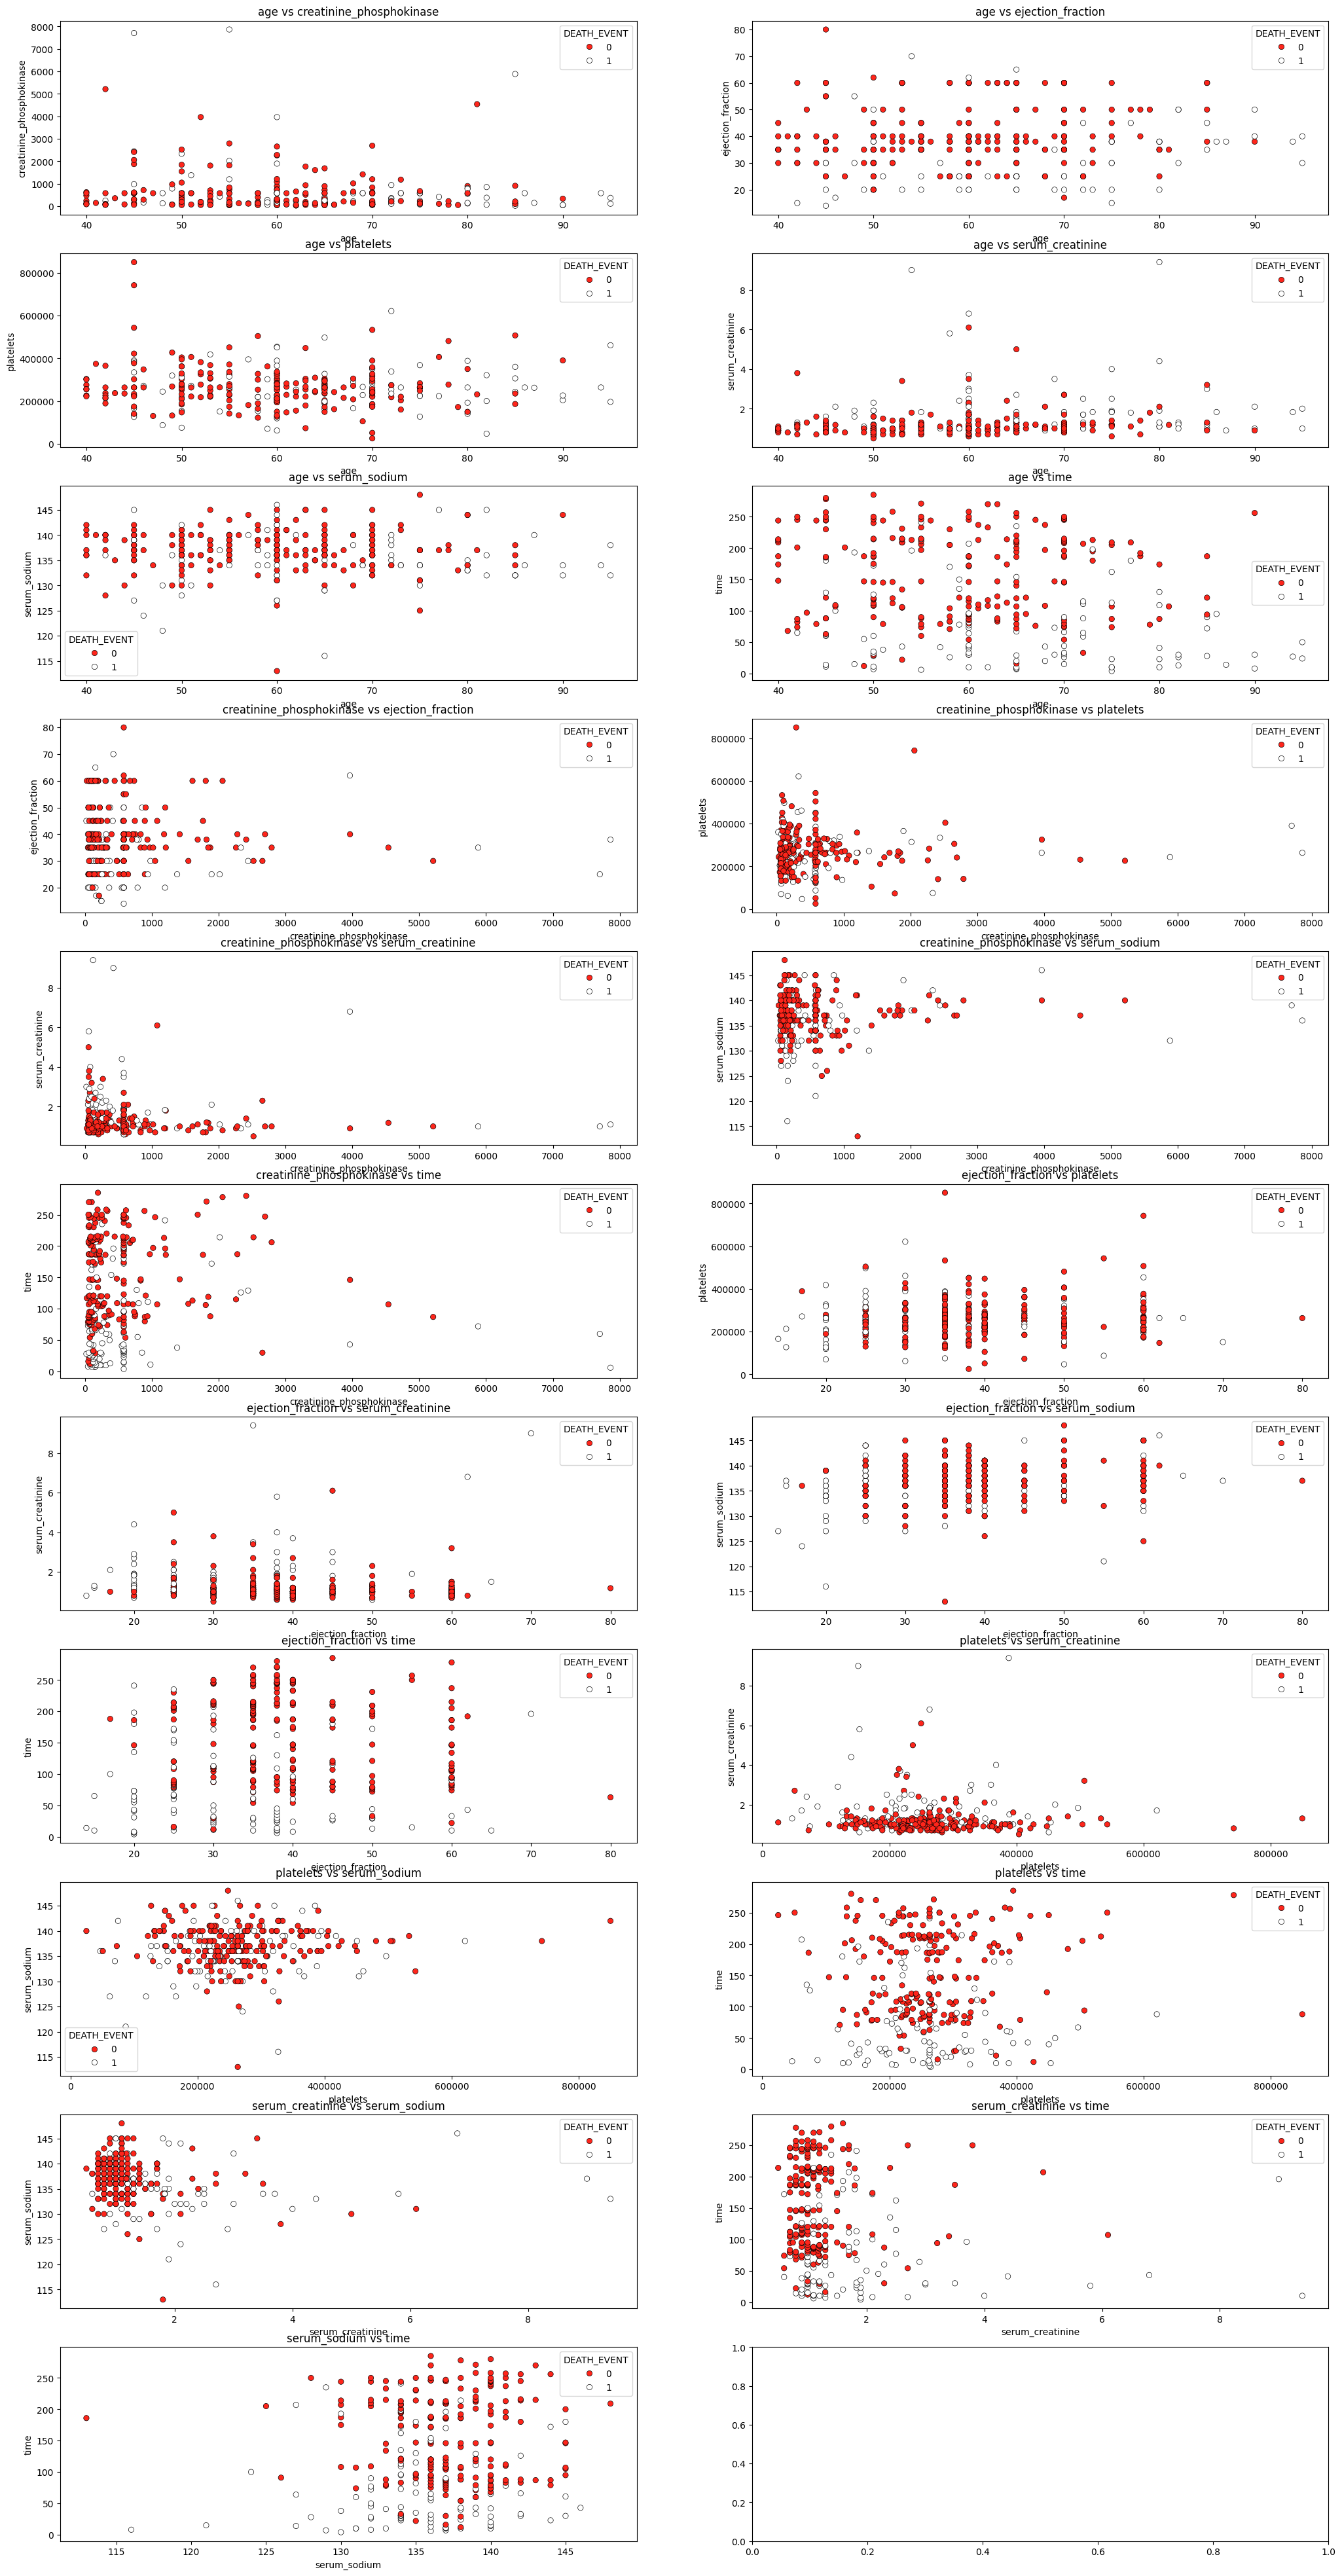

In [27]:
a = 0
fig,ax = plt.subplots(nrows = 11,ncols = 2,figsize = (25,50),squeeze = False)
for i in range(len(numerical_features) - 1):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(11,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'DEATH_EVENT',palette = colors,edgecolor = 'black');
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- For **time vs age** plot, **DEATH_EVENT** peaks can be found at **age** values of 50, 60, 70 and 80 for **time** value range between **50 - 100**.
- **creatinine_phosphokinase** values between 0 - 500 are dominant in recording **DEATH_EVENT** irrespective of other features.
- Similarly, **ejaction_fraction** values between **20 - 40** record high number of cases of **DEATH_EVENT**.
- **platelets** range of values between **2x10^5 - 4x10^5** and **time** between **0 - 50** is a strong indicator for **DEATH_EVENT**.
- Another indicator for **DEATH_EVENT** is **serum_creatinine** values from **1 - 2**.
- **serum_sodium** range of values from **130 - 140** record high number of cases for **DEATH_EVENT**.

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Summary EDA</div></center>

### Order / Values of features for positive cases of heart failure (DEATH_EVENT) :

- **Categorical Features (Order) :**
    
    - **anaemia** : Anaemia = No Anaemia
    - **diabetes** : Diabetes = No Diabetes
    - **high_blood_pressure** : High Blood Pressure > No High Blood Pressure (Needs more data)
    - **sex** : Male > Female
    - **smoking** : Smoking > No Smoking


- **Numerical Features (Range) :**
    
    - **age** : 50 - 70
    - **creatinine_phosphokinase** : 0 - 500
    - **ejaction_fraction** : 20 - 40
    - **platelets** : 200,000 - 300,000
    - **serum_creatinine** : 1 - 2
    - **serum_sodium** : 130 - 140
    - **time** : 0 - 50


- **According to the data, these order / range of values possibly leads to heart failures.**

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Descriptive Analytics</div></center>

### Convert Data

In [28]:
# Map 0 to False and 1 to True in "anaemia", "diabetes", "high_blood_pressure", "smoking" and "DEATH_EVENT" columns
data["anaemia"] = data["anaemia"].map({0: False, 1: True})
data["diabetes"] = data["diabetes"].map({0: False, 1: True})
data["high_blood_pressure"] = data["high_blood_pressure"].map({0: False, 1: True})
data["smoking"] = data["smoking"].map({0: False, 1: True})
data["DEATH_EVENT"] = data["DEATH_EVENT"].map({0: False, 1: True})

# Map 0 to Woman and 1 to Man in "sex" column
data["sex"] = data["sex"].map({0: "Woman", 1: "Man"})

data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,creatinine_phosphokinase_Group,platelets_Group,time_Group
0,75,False,582,False,20,True,265000,1.90,130,Man,False,4,True,5,2,0
1,55,False,7861,False,38,False,263358,1.10,136,Man,False,6,True,78,2,1
2,65,False,146,False,20,False,162000,1.30,129,Man,True,7,True,1,1,1
3,50,True,111,False,20,False,210000,1.90,137,Man,False,7,True,1,2,1
4,65,True,160,True,20,False,327000,2.70,116,Woman,False,8,True,1,3,1


### Q1: How is the distribution of heart failure patients who are alive and dead?

In [29]:
data.groupby(by="DEATH_EVENT").size()

DEATH_EVENT
False    203
True      96
dtype: int64

Based on the results, there are 96 recorded deaths among heart failure patients, while 203 patients are still alive.

### Q2: What is the age range of heart failure patients?

In [30]:
data["age"].describe()

count   299.00
mean     60.83
std      11.89
min      40.00
25%      51.00
50%      60.00
75%      70.00
max      95.00
Name: age, dtype: float64

Based on the results, heart failure patients range from 40 to 95 years old, with an average age of 61 year old.

### Q3: What is the gender proportion of heart failure patients?

In [31]:
data.groupby(by="sex").size()

sex
Man      194
Woman    105
dtype: int64

Based on the results, there are 105 women and 194 men among the heart failure patients.

### Q4: What is the proportion of heart failure patients that are smoking based on gender?

In [32]:
data.groupby(by=["smoking", "sex"]).size()

smoking  sex  
False    Man      102
         Woman    101
True     Man       92
         Woman      4
dtype: int64

Based on the results, 96 patients are smokers, with the majority being men.

### Q5: What is the proportion of heart failure patients with comorbidities (anemia, diabetes, hypertension) and without comorbidities?

In [33]:
data.groupby(by=["anaemia", "diabetes", "high_blood_pressure"]).size()

anaemia  diabetes  high_blood_pressure
False    False     False                  67
                   True                   31
         True      False                  46
                   True                   26
True     False     False                  45
                   True                   31
         True      False                  36
                   True                   17
dtype: int64

Based on the results, only 67 patients have no comorbidities, while the remaining patients have one or more comorbidites.

# References:


1. Chicco D, Jurman G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak. 2020 Feb 3;20(1):16. 
2. Kaggle. Heart Failure Prediction [Internet]. San Francisco, CA: Kaggle; [date unknown]. [cited 2024 Sep 11]. Available from: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data